<a href="https://colab.research.google.com/github/refi350/CVLearning/blob/main/Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - loss: 142218.9219 - val_loss: 98054.0781
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 96998.7422 - val_loss: 64901.9688
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 64168.5703 - val_loss: 37775.2656
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 37331.5859 - val_loss: 17892.5547
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 17695.9902 - val_loss: 5621.3604
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5585.5454 - val_loss: 519.1746
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 562.3865 - val_loss: 436.2548
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 428.8721 - val_loss: 3055.6262
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2918.0608 - val_loss: 5925.3188
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5609.4492 - val_loss: 7231.7031
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6805.9624 - val_loss: 6683.1431
E

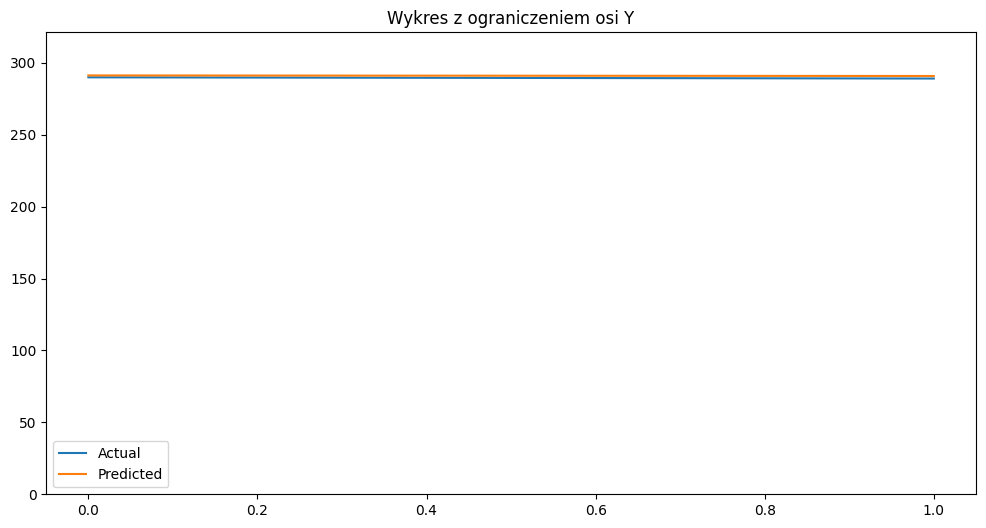

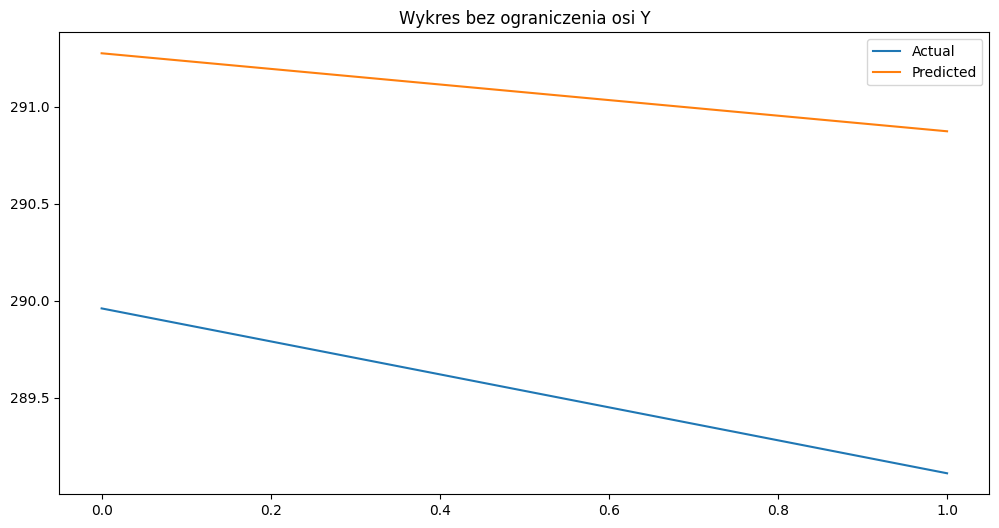

In [1]:
# First of all you need to install numpy and tensorflow/keras as follows

# pip install numpy tensorflow matplotlib

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt


# Generate some sample temperature data (replace with your actual data)

#data = np.sin(np.linspace(0, 100, 1000)) + np.random.normal(0, 0.1, 1000)
# Wiem, że mogę to w pliku, ale nie wiem jak to w colabie przekazać dane i w sumie 48 wpisów to za mało, żeby nauczyć sztuczną inteligencje
data = [{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.89,"temp_min":288.468,"temp_max":291.15,"feels_like":287.15,"pressure":1004,"humidity":77},"wind":{"speed":5.1,"deg":230},"clouds":{"all":90},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"dt":1593561600,"dt_iso":"2020-07-01 00:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.27,"temp_min":287.588,"temp_max":290.37,"feels_like":287.7,"pressure":1004,"humidity":82},"wind":{"speed":3.6,"deg":230},"clouds":{"all":90},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"dt":1593565200,"dt_iso":"2020-07-01 01:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.97,"temp_min":287.257,"temp_max":290.15,"feels_like":285.66,"pressure":1003,"humidity":72},"wind":{"speed":5.1,"deg":240},"clouds":{"all":90},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"dt":1593568800,"dt_iso":"2020-07-01 02:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.33,"temp_min":287.037,"temp_max":289.26,"feels_like":285.48,"pressure":1003,"humidity":77},"wind":{"speed":4.6,"deg":240},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593572400,"dt_iso":"2020-07-01 03:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":287.75,"temp_min":285.93,"temp_max":289.15,"feels_like":285.09,"pressure":1003,"humidity":77},"wind":{"speed":4.1,"deg":240},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593576000,"dt_iso":"2020-07-01 04:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":287.19,"temp_min":285.37,"temp_max":289.1,"feels_like":284.3,"pressure":1003,"humidity":82},"wind":{"speed":4.6,"deg":230},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01d"}],"dt":1593579600,"dt_iso":"2020-07-01 05:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.27,"temp_min":287.04,"temp_max":289.15,"feels_like":285.12,"pressure":1003,"humidity":72},"wind":{"speed":4.6,"deg":250},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01d"}],"dt":1593583200,"dt_iso":"2020-07-01 06:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.4,"temp_min":287.3,"temp_max":290.93,"feels_like":285.91,"pressure":1003,"humidity":67},"wind":{"speed":5.1,"deg":250},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01d"}],"dt":1593586800,"dt_iso":"2020-07-01 07:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.12,"temp_min":289.15,"temp_max":292.59,"feels_like":287.05,"pressure":1004,"humidity":63},"wind":{"speed":6.2,"deg":250},"clouds":{"all":20},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"dt":1593590400,"dt_iso":"2020-07-01 08:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.94,"temp_min":290.15,"temp_max":293.15,"feels_like":288.44,"pressure":1004,"humidity":56},"wind":{"speed":5,"deg":240},"clouds":{"all":40},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"dt":1593594000,"dt_iso":"2020-07-01 09:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":292.7,"temp_min":290.93,"temp_max":294.26,"feels_like":289.39,"pressure":1004,"humidity":56},"wind":{"speed":5,"deg":240},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593597600,"dt_iso":"2020-07-01 10:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":293.15,"temp_min":291.15,"temp_max":294.82,"feels_like":289.83,"pressure":1004,"humidity":52},"wind":{"speed":4.74,"deg":238},"clouds":{"all":40},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"dt":1593601200,"dt_iso":"2020-07-01 11:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":293.13,"temp_min":291.15,"temp_max":294.82,"feels_like":289.91,"pressure":1004,"humidity":52},"wind":{"speed":4.6,"deg":250},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593604800,"dt_iso":"2020-07-01 12:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":293.51,"temp_min":292.04,"temp_max":294.82,"feels_like":290.03,"pressure":1004,"humidity":52},"wind":{"speed":5.1,"deg":240},"rain":{"3h":1},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593608400,"dt_iso":"2020-07-01 13:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":292.79,"temp_min":290.902,"temp_max":295.15,"feels_like":288.91,"pressure":1005,"humidity":49},"wind":{"speed":5.1,"deg":260},"rain":{"3h":0.31},"clouds":{"all":100},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593612000,"dt_iso":"2020-07-01 14:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.68,"temp_min":289.82,"temp_max":293.15,"feels_like":288.75,"pressure":1006,"humidity":72},"wind":{"speed":5.7,"deg":250},"rain":{"3h":0.31},"clouds":{"all":100},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593615600,"dt_iso":"2020-07-01 15:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.68,"temp_min":289.26,"temp_max":293.15,"feels_like":288.75,"pressure":1005,"humidity":72},"wind":{"speed":5.7,"deg":230},"rain":{"3h":0.31},"clouds":{"all":100},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593619200,"dt_iso":"2020-07-01 16:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.89,"temp_min":289.26,"temp_max":293.71,"feels_like":289.79,"pressure":1006,"humidity":72},"wind":{"speed":4.6,"deg":230},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01d"}],"dt":1593622800,"dt_iso":"2020-07-01 17:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.26,"temp_min":289.26,"temp_max":292.59,"feels_like":287.92,"pressure":1005,"humidity":68},"wind":{"speed":5.7,"deg":250},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01d"}],"dt":1593626400,"dt_iso":"2020-07-01 18:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":290.56,"temp_min":288.15,"temp_max":293.15,"feels_like":287.02,"pressure":1006,"humidity":68},"wind":{"speed":5.7,"deg":250},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593630000,"dt_iso":"2020-07-01 19:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.48,"temp_min":287.15,"temp_max":291.48,"feels_like":286.2,"pressure":1006,"humidity":77},"wind":{"speed":5.7,"deg":250},"clouds":{"all":79},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593633600,"dt_iso":"2020-07-01 20:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.05,"temp_min":287.15,"temp_max":290.37,"feels_like":287.46,"pressure":1007,"humidity":77},"wind":{"speed":3.1,"deg":240},"clouds":{"all":79},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593637200,"dt_iso":"2020-07-01 21:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.03,"temp_min":287.15,"temp_max":290.93,"feels_like":287.38,"pressure":1007,"humidity":82},"wind":{"speed":3.6,"deg":230},"clouds":{"all":79},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593640800,"dt_iso":"2020-07-01 22:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.51,"temp_min":287.04,"temp_max":290.15,"feels_like":286.42,"pressure":1007,"humidity":77},"wind":{"speed":3.6,"deg":240},"clouds":{"all":0},"weather":[{"id":800,"main":"Clear","description":"sky is clear","icon":"01n"}],"dt":1593644400,"dt_iso":"2020-07-01 23:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.06,"temp_min":285.93,"temp_max":289.82,"feels_like":285.42,"pressure":1007,"humidity":82},"wind":{"speed":4.6,"deg":250},"clouds":{"all":40},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"dt":1593648000,"dt_iso":"2020-07-02 00:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":287.04,"temp_min":284.82,"temp_max":289.26,"feels_like":282.34,"pressure":1007,"humidity":63},"wind":{"speed":5.7,"deg":270},"clouds":{"all":20},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"dt":1593651600,"dt_iso":"2020-07-02 01:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":286,"temp_min":283.376,"temp_max":288.15,"feels_like":282.4,"pressure":1007,"humidity":67},"wind":{"speed":4.1,"deg":240},"clouds":{"all":77},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593655200,"dt_iso":"2020-07-02 02:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":285.43,"temp_min":283.15,"temp_max":287.15,"feels_like":282.84,"pressure":1008,"humidity":76},"wind":{"speed":3.1,"deg":240},"clouds":{"all":77},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593658800,"dt_iso":"2020-07-02 03:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":285.12,"temp_min":283.15,"temp_max":287.15,"feels_like":281.4,"pressure":1007,"humidity":76},"wind":{"speed":4.6,"deg":240},"clouds":{"all":77},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593662400,"dt_iso":"2020-07-02 04:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":285.29,"temp_min":283.15,"temp_max":287.639,"feels_like":281.89,"pressure":1008,"humidity":82},"wind":{"speed":4.6,"deg":240},"rain":{"3h":1},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593666000,"dt_iso":"2020-07-02 05:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":286.42,"temp_min":284.82,"temp_max":287.639,"feels_like":283.32,"pressure":1008,"humidity":82},"wind":{"speed":4.6,"deg":250},"rain":{"3h":1},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593669600,"dt_iso":"2020-07-02 06:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":287.98,"temp_min":286.15,"temp_max":289.82,"feels_like":284.41,"pressure":1009,"humidity":72},"wind":{"speed":5.1,"deg":240},"rain":{"3h":1},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593673200,"dt_iso":"2020-07-02 07:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":288.96,"temp_min":287.04,"temp_max":291.134,"feels_like":284.93,"pressure":1009,"humidity":67},"wind":{"speed":5.7,"deg":260},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593676800,"dt_iso":"2020-07-02 08:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.48,"temp_min":288.15,"temp_max":291.134,"feels_like":285.59,"pressure":1009,"humidity":67},"wind":{"speed":5.7,"deg":250},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593680400,"dt_iso":"2020-07-02 09:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":290.51,"temp_min":288.71,"temp_max":291.48,"feels_like":286.96,"pressure":1009,"humidity":68},"wind":{"speed":5.7,"deg":250},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"dt":1593684000,"dt_iso":"2020-07-02 10:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.32,"temp_min":289.26,"temp_max":293.71,"feels_like":288.08,"pressure":1010,"humidity":63},"wind":{"speed":5.1,"deg":240},"rain":{"1h":0.51},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593687600,"dt_iso":"2020-07-02 11:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":290.88,"temp_min":288.15,"temp_max":293.238,"feels_like":287.43,"pressure":1010,"humidity":68},"wind":{"speed":5.7,"deg":240},"rain":{"3h":1},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593691200,"dt_iso":"2020-07-02 12:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.16,"temp_min":289.15,"temp_max":293.238,"feels_like":287.79,"pressure":1011,"humidity":68},"wind":{"speed":5.7,"deg":250},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593694800,"dt_iso":"2020-07-02 13:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":292.74,"temp_min":290.15,"temp_max":295.93,"feels_like":289.5,"pressure":1011,"humidity":68},"wind":{"speed":6.2,"deg":250},"rain":{"1h":0.25},"clouds":{"all":12},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593698400,"dt_iso":"2020-07-02 14:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":293.44,"temp_min":290.93,"temp_max":296.48,"feels_like":289.45,"pressure":1011,"humidity":60},"wind":{"speed":6.7,"deg":250},"rain":{"3h":1.44},"clouds":{"all":12},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593702000,"dt_iso":"2020-07-02 15:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":293.6,"temp_min":291.48,"temp_max":295.273,"feels_like":290.36,"pressure":1011,"humidity":60},"wind":{"speed":5.7,"deg":260},"rain":{"3h":1.44},"clouds":{"all":12},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593705600,"dt_iso":"2020-07-02 16:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":292.6,"temp_min":290.1,"temp_max":294.15,"feels_like":288.57,"pressure":1012,"humidity":72},"wind":{"speed":7.7,"deg":300},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593709200,"dt_iso":"2020-07-02 17:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.67,"temp_min":289.26,"temp_max":294.15,"feels_like":293.08,"pressure":1013,"humidity":82},"wind":{"speed":0.5,"deg":0},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593712800,"dt_iso":"2020-07-02 18:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":291.09,"temp_min":288.71,"temp_max":293.7,"feels_like":290.82,"pressure":1013,"humidity":82},"wind":{"speed":2.6,"deg":250},"clouds":{"all":0},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593716400,"dt_iso":"2020-07-02 19:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":290.25,"temp_min":287.15,"temp_max":292.04,"feels_like":290.85,"pressure":1013,"humidity":88},"wind":{"speed":1.5,"deg":220},"rain":{"3h":0.5},"clouds":{"all":5},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10d"}],"dt":1593720000,"dt_iso":"2020-07-02 20:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":290.03,"temp_min":287.15,"temp_max":292.04,"feels_like":290.13,"pressure":1014,"humidity":88},"wind":{"speed":2.1,"deg":240},"rain":{"3h":0.5},"clouds":{"all":5},"weather":[{"id":500,"main":"Rain","description":"light rain","icon":"10n"}],"dt":1593723600,"dt_iso":"2020-07-02 21:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.96,"temp_min":287.15,"temp_max":292.04,"feels_like":290.46,"pressure":1015,"humidity":88},"wind":{"speed":1.5,"deg":210},"clouds":{"all":20},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"dt":1593727200,"dt_iso":"2020-07-02 22:00:00 +0000 UTC","timezone":3600},{"city_name":"London","lat":51.507351,"lon":-0.127758,"main":{"temp":289.11,"temp_min":287.003,"temp_max":290.93,"feels_like":288.09,"pressure":1015,"humidity":88},"wind":{"speed":3.25,"deg":277},"clouds":{"all":75},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"dt":1593730800,"dt_iso":"2020-07-02 23:00:00 +0000 UTC","timezone":3600}]

if isinstance(data, list):
  temp = []
  for wpis in data:
    temp.append(wpis.get('main', {}).get('temp'))

# Split the data into input (X) and output Tak sequences

sequence_length = 10  # You can adjust this based on your data

X = []

y = []

for i in range(len(temp) - sequence_length):

    X.append(temp[i:i+sequence_length])

    y.append(temp[i+sequence_length])


X = np.array(X)

y = np.array(y)


# Split the data into training and testing sets

split_ratio = 0.75  # You can adjust this as needed

split_index = int(split_ratio * len(temp))


X_train, X_test = X[:split_index], X[split_index:]

y_train, y_test = y[:split_index], y[split_index:]


# Build a simple feedforward neural network

model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(sequence_length,)),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(1)  # Output layer

])


model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


# Make predictions

y_pred = model.predict(X_test)


# Plot the results

# Wykres 1 (z plt.ylim())
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylim(0, max(y_test.max(), y_pred.max()) + 30.0)
plt.title('Wykres z ograniczeniem osi Y')  # Dodaj tytuł dla rozróżnienia
plt.show()

# Wykres 2 (bez plt.ylim())
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Wykres bez ograniczenia osi Y')  # Dodaj tytuł dla rozróżnienia
plt.show()